In [1]:
import xarray as xr # top library for manipulating netcdf files
import netCDF4 # more basic library for manipulating netcdf files, used for exploring
import matplotlib.pyplot as plt # ploting library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np

# Get familiarized with netcdf files
Netcdf files, or files with an .nc extension are containers for complex datasets, and can store any kind of information.
You can read more about NetCDF here: https://www.unidata.ucar.edu/software/netcdf/. 
They are mostly used to store grided datasets (e.g. data is stored in some dimensional grid, in which each point of data is located in some (x) or (x,y) or (x,y,z) or higer multidimensional space.
Satelite data files are usualy delivered as .nc, but there are several layers of information that should be unraveled before geting to the data and the location of the data.

In [5]:
#get this file from slack or dowload one from oceancolor
#path = '/mnt/beegfs/home/hbridgham2021/Desktop/NASA_DATA/IOPS_OCT_NOV_L2_MODIS/A2021278191000.L2_LAC_IOP.x.nc'
#path = '/mnt/beegfs/home/hbridgham2021/Desktop/NASA_DATA/IOPS_OCT_NOV_L2_MODIS/A2021285191500.L2_LAC_IOP.x.nc' #really good
#path = '/mnt/beegfs/home/hbridgham2021/Desktop/NASA_DATA/IOPS_OCT_NOV_L2_MODIS/A2021294191000.L2_LAC_IOP.x.nc'
#path = '/mnt/beegfs/home/hbridgham2021/Desktop/NASA_DATA/IOPS_OCT_NOV_L2_MODIS/A2021301191500.L2_LAC_IOP.x.nc'
#path = '/mnt/beegfs/home/hbridgham2021/Desktop/NASA_DATA/IOPS_OCT_NOV_L2_MODIS/A2021310191000.L2_LAC_IOP.x.nc' #alos good 
#path = '/mnt/beegfs/home/hbridgham2021/Desktop/NASA_DATA/IOPS_OCT_NOV_L2_MODIS/A2021317191500.L2_LAC_IOP.x.nc'
#path = '/mnt/beegfs/home/hbridgham2021/Desktop/NASA_DATA/IOPS_OCT_NOV_L2_MODIS/A2021326191000.L2_LAC_IOP.x.nc'
#path = '/mnt/beegfs/home/hbridgham2021/Desktop/NASA_DATA/IOPS_OCT_NOV_L2_MODIS/A2021333191500.L2_LAC_IOP.x.nc' #really good
path = './../SAT_DATA/IOPS_OCT_NOV_L2_MODIS/A2021285191500.L2_LAC_IOP.x.nc'
ds = xr.open_dataset(path)
nc = netCDF4.Dataset(path)

In [6]:
#in loop form:

for g in nc.groups:
    print(g)
    
nc

sensor_band_parameters
scan_line_attributes
geophysical_data
navigation_data
processing_control


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: MODISA Level-2 Data
    product_name: A2021285191500.L2_LAC_IOP.nc
    processing_version: 2018.1
    equatorCrossingLongitude: 83.7901
    orbit_number: 103417
    history: l2gen par=/data19/sdpsoper/vdc/vpu38/workbuf/A2021285191500.L1B_LAC.param metafile=A2021285191500.L2_LAC_IOP.nc.meta
    instrument: MODIS
    platform: Aqua
    Conventions: CF-1.6 ACDD-1.3
    license: https://science.nasa.gov/earth-science/earth-science-data/data-information-policy/
    naming_authority: gov.nasa.gsfc.sci.oceandata
    id: 2018.1/L2/A2021285191500.L2_LAC_IOP.nc
    date_created: 2022-01-22T05:30:18.000Z
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    keywords: Earth Science > Oceans > Ocean Optics > Reflectance
    standard_name_vocabulary: CF Standard Name Table v36
    institution: NASA Goddard Space Flight Center, Ocean Ecology Laboratory, Ocean Biology Pro

In [7]:
def load_satdata(path):
    # Reads a MODIS data file
    data = xr.open_dataset(path, group='geophysical_data')
    navigation = xr.open_dataset(path, group='navigation_data')
    # rename the names of navigation dims so they are the same as the data dims
    navigation = navigation.rename({'pixel_control_points': 'pixels_per_line'})
    # we have to filter data that doesnt have lat or lon values (nan), 
    # because there can't be a data point without a location
    # ~ means no, ~().isnull(), means give me the values that are NOT nans
    mask = (~navigation['latitude'].isnull()) & (~navigation['longitude'].isnull())
    # filter to get only data with lat/lon values
    data = data.where(mask, drop=True)
    # add 'lat', 'lon' variables to data, from the navigation dataset
    data['lat'] = navigation['latitude'].where(mask, drop=True)
    data['lon'] = navigation['longitude'].where(mask, drop=True)
    # return the dataset
    return data

In [8]:
# ds is a Dataset
# ds['sst'] is a Dataarray, a variable in the dataset
# explore

ds = load_satdata(path)
ds

<xarray.Dataset>
Dimensions:           (number_of_lines: 1777, pixels_per_line: 1308)
Dimensions without coordinates: number_of_lines, pixels_per_line
Data variables: (12/32)
    a_412_giop        (number_of_lines, pixels_per_line) float32 0.0192 ... nan
    a_443_giop        (number_of_lines, pixels_per_line) float32 0.0198 ... nan
    a_469_giop        (number_of_lines, pixels_per_line) float32 0.0208 ... nan
    a_488_giop        (number_of_lines, pixels_per_line) float32 0.0221 ... nan
    a_531_giop        (number_of_lines, pixels_per_line) float32 0.0452 ... nan
    a_547_giop        (number_of_lines, pixels_per_line) float32 0.0521 ... nan
    ...                ...
    aph_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.0008001 .....
    adg_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.0003002 .....
    bbp_unc_443_giop  (number_of_lines, pixels_per_line) float32 0.00012 ... 0.0
    l2_flags          (number_of_lines, pixels_per_line) float64 0.0 ... 1.07...
    lat               (number_of_lines, pixels_per_line) float32 17.68 ... 30.12
    lon               (number_of_lines, pixels_per_line) float32 -78.38 ... -...

## some basic ploting
pcolormesh recives a data variable that has 2 dimensions (e.g xy) and plots a value (color) in an x-y space.

plt.pcolormesh(var) will work if var has two dimensions, but will not know what x or y are.

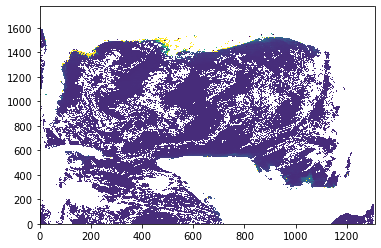

In [9]:
plt.pcolormesh(ds['a_412_giop'])
# but there is no location information on it (the map is fliped)

C:\Users\12532\AppData\Local\Temp\ipykernel_30972\1383022991.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ds['lon'], ds['lat'], ds['a_667_giop']/ds['a_488_giop'])


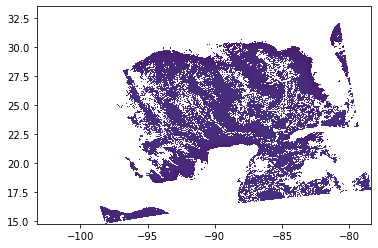

In [11]:
#Rrs(667)/Rrs(488)
plt.pcolormesh(ds['lon'], ds['lat'], ds['a_667_giop']/ds['a_488_giop'])

you can specify locations for x and y. x, y and var have to have the same shape
plt.pcolormesh(x, y, var)

/mnt/beegfs/home/hbridgham2021/.conda/envs/bugs/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


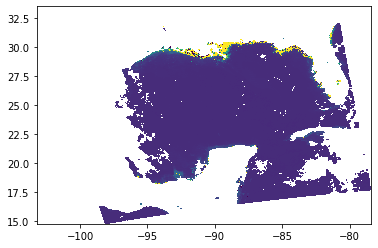

In [79]:
plt.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'])

# Chalenge:

try to build a function to plot a variable from the dataset, restricted to a extent box.
The extent box wil have left, right (lon) and bottom, top (lat) bounds for the map.
Use the structure below to start builiding your function

In [22]:
def plot_map(ds, var, extent =[-100, -75, 18, 31] ):
    ''' 
    Plots a map of a chosen variable from a dataset, bounded to a box
    input:
    ds : an xarray dataset
    var: a string, the name of a variable
    extent: a list of bounds on the form [left, right, bottom, top]
    ''' 
    #ds dataset should be reduced, with lat lon conditions
    mask = (ds['lon'] >= extent[0] & 
            ds['lon'] <= extent[1] & 
            ds['lat'] >= extent[2] & 
            ds['lat'] <= extent[3]) 
    ds = ds.where(mask, drop=True)
    
    plt.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'])

In [1]:
#this should work if your function is correct
plot_map(ds, 'sst', [-100, -75, 18, 31])

NameError: name 'plot_map' is not defined